## Understanding Principal Component Analysis

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plot
import pandas as panda
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
X, y = load_wine(return_X_y = True)

In [3]:
X.shape, y.shape

((178, 13), (178,))

#### We can see that our feature set has 13 dimensions, making it imposiible for us to visualize it against the dependent variable y

#### However lets just proceed and check for accuracies in the model, leaving the data as is and without any feature extraction

In [4]:
np.random.seed(1243)# setting the seed for reproducibility

In [5]:
np.bincount(y), np.unique(y)

(array([59, 71, 48], dtype=int64), array([0, 1, 2]))

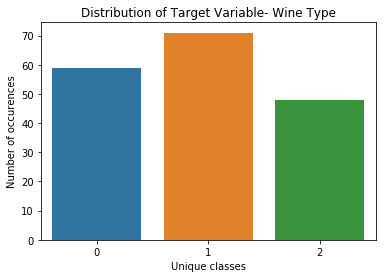

In [6]:
sns.barplot(x= np.unique(y), y = np.bincount(y))
plot.xlabel('Unique classes')
plot.ylabel('Number of occurences')
plot.title('Distribution of Target Variable- Wine Type')
plot.show()

In [7]:
x_train, x_test, y_train,y_test = train_test_split(X,y , stratify = y)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, np.bincount(y_test)

((133, 13), (45, 13), (133,), (45,), array([15, 18, 12], dtype=int64))

In [9]:
# classifier = LogisticRegression(max_iter = 1000, class_weight = 'balanced', solver = 'lbfgs') ## solver is a solver geared for multiclass

# the above classifier ends up being a real good classifier, considering the data size, and accurately predicts all
# however we would like to create a weak learner

classifier = Perceptron(max_iter = 50)


In [10]:
classifier.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_predictions = classifier.predict(x_test)

In [12]:
accuracy_score(y_test, y_predictions)

0.7111111111111111

In [13]:
panda.crosstab(

    panda.Series(y_predictions, name = 'Predictions'),
    panda.Series(y_test, name = 'Actual'),
    margins = True

)

## we can see below that the model has misclassified 5 wines type out of 18 wines for type 1 wine
## it has also misclassified 6 out of 12 wines for type 2 wine

Actual,0,1,2,All
Predictions,,,,
0,15,2,2,19
1,0,13,6,19
2,0,3,4,7
All,15,18,12,45


In [14]:
np.unique(y_predictions),np.bincount(y_predictions),np.unique(y_test),np.bincount(y_test)

(array([0, 1, 2]),
 array([19, 19,  7], dtype=int64),
 array([0, 1, 2]),
 array([15, 18, 12], dtype=int64))

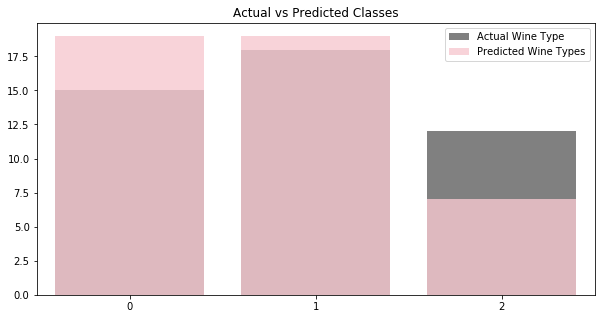

In [15]:

plot.figure(figsize= (10,5))
sns.barplot(x=np.unique(y_test),y=np.bincount(y_test), color='grey', label='Actual Wine Type')
sns.barplot(x=np.unique(y_predictions),y=np.bincount(y_predictions), color='pink', alpha=0.8, label='Predicted Wine Types')
plot.legend(loc = 'best')
plot.title('Actual vs Predicted Classes')
plot.show()

#### Observation from the classification matrix and the overlaying bar plot:

##### 1. It has classified more number of wine type 0 than there actually is ( 15 type 0 wine, our classifier says 19)
##### 2. It has classified more number of wine type 1 than there actually is ( 18 type 1 wine, our classifier says 19)
##### 3. It has classified less number of wine type 2 than there actually is ( 12 type 2 wine, our classifier says 7)

<br><br>
## Lets now check for feature extraction techniques to try and improve our accuracies

One feature extraction technique is to use principal component analysis as a dimensionality reduction tool. In feature extraction techniques the following happens:


1. lets say there are 17 old independent variables. (in our example above, X dimension is 17 columns)
2. We will not randomly drop one or few of those columns( this is called feature selection) because it may lead to information loss
3. Instread using feature extraction techniques, we will create 17 'new' variables each of which is a linear combination of each of the 17 old variables.
4. Each of the new variables created will carry information of all the old variables , however they will demonstrate differing variances.
5. Those new variables are called principal components, and we will select the highest principal components which display most variance
6. Highest order principal components display highest degree of variance(meaning better degree of using this variable as a way of classifying or categorizing) and they will also be independent of each other.

##### How to calculate the principal components?

say dimension of X feature set is n * p. That is, p columns across n rows of data.


1. standardize your X feature set. Use sklearn.preprocessing.StandardScaler


2. create a new matrix of dimension p * p. This matrix is called the covariance matrix. 


3. Each element of covariance matrix can be calculated as : 

        i.   ( sum for all i =1..n ( xij - mean(xj) ) * ( xik - mean(xk) ) ) / n
        
        ii.  n = number of rows
        
        iii. xj and xk are columns in the feature set of x
        
        iv.  point one will hence give us the covariance between feature xj and xk. 


4. how to create a covariance matrix? we can use np.cov method. Additionally covariance matrix can also be found as (X transposed).dot(X). This matrix will be scaled to nth degree, meaning each element will be 2,3,4,etc times the actual value. However since every element is scaled to same higher order, we can use this covariance matrix as well.


5. Additonally we can also perform this action using code. which we will show below


6. Once we have found the covariance matrix , we will perform eigen decomposition to find the eigen vector and the eigen value of the covariance matrix.


7. how do we calculate the eigen vector and eigen value? we can use np.linalg.eig method and pass in the covariance matrix as an input. 


8. Additinally steps 3-7, can be achieved in one shot using singular value decomposition , np.inalg.svd


9. Our <b>eigen vectors are infact the principal components</b>. Each of these eigen vectors carry information of each of the old variables, weighted by their contribution in explaining the variance. Simply put, higher magnitude of eigen vectors , are able to classify the dependent variable to a higher degree.


10. From where do we get the magnitude of these eigen vectors? We get them from the eigen values.


11. So to see the change in variance for each of these principal components, we can plot a curve and check the elbow point. Elbow point is the point after which, principal components do not really  contribute to change in variance and can be dropped.


12. In order to now transform the X feature sets into our principal components, lets select the number of eigenvectors we would like to keep. Usually it would be the number of top most principal components, pre elbow point. Lets say the number is k


13. Sort the eigen values and eigen vectors from top to smallest. Create eigen pairs of them , essentially a tuple of eigen value and corresponding eigen vector


14. Create a matrix from the above eigen pair, taking top k number of tuples. Let this matrix be P


15. create another matrix pca_x which is equal to x_std.dot(P). Matrix pca_x is the principal component transformed view of the X feature set. If k < p, we have reduced our dimension from p to k number of dimensions.




#### Lets apply each of the above steps in our wine data set to perform a principal component analysis dimension reduction


<br>

<b>HOW TO CREATE A COVARIANCE MATRIX  - DIFFERENT TECHNIQUES

In [16]:
X.shape

(178, 13)

In [17]:
## the very first step is to scale the feature set
x_std = StandardScaler().fit_transform(X)

In [18]:
## first very simplest step..simply dot product of transposed and itself
## our covariance matrix will ofcouse be 13 cross 13 size. 

covariance_using_transpose = x_std.T.dot(x_std)

print(covariance_using_transpose.shape)

(13, 13)


In [19]:
## second manual step. we will consider each column and subtract the mean

# since we are performing mean across axis 0 , is row wise, we are actually getting mean of values across columns
mean_for_each_feature = np.mean(x_std, axis = 0) #mean across each column, we are mean-ing rowwise

# subtract each columns from its mean. dot product of matrix transposed and matrix

covariance_ = (x_std - mean_for_each_feature).T.dot((x_std - mean_for_each_feature))
covariance_manually = covariance_/x_std.shape[0] # divide by number of rows


print(covariance_manually.shape)

(13, 13)


In [20]:
# third step, simply use the numpy cov funxtion
covariance_using_numpy = np.cov(x_std.T)

print(covariance_using_numpy.shape)

(13, 13)


In [21]:
## lets compare some values from each covariance technqiue
# covariance_manually, covariance_using_numpy, covariance_using_transpose
print('covariance_using_transpose[0][3]: ', covariance_using_transpose[0][3],'covariance_using_transpose[3][0]: ',covariance_using_transpose[3][0] )
print('covariance_manually[0][3]: ', covariance_manually[0][3],'covariance_manually[3][0]: ', covariance_manually[3][0])
print('covariance_using_numpy[0][3]: ', covariance_using_numpy[0][3],'covariance_using_numpy[3][0]: ', covariance_using_numpy[3][0])

covariance_using_transpose[0][3]:  -55.22185436661314 covariance_using_transpose[3][0]:  -55.22185436661314
covariance_manually[0][3]:  -0.31023513689108506 covariance_manually[3][0]:  -0.31023513689108506
covariance_using_numpy[0][3]:  -0.3119878777774758 covariance_using_numpy[3][0]:  -0.3119878777774758


###### we will observe that numpy calculation and our own calculation using mean functions is giving same results(almost)
###### using simple transpose technique, is also giving us same result, however each point is multiplied by the order of n (no of rows)

<br>

<b>HOW TO DERIVE EIGEN VALUES AND EIGEN VECTORS

In [22]:
eigen_values_using_transposed_matrix,eigen_vectors_using_transposed_matrix = np.linalg.eig(covariance_using_transpose)

In [23]:
eigen_values_using_transposed_matrix,eigen_vectors_using_transposed_matrix

(array([837.64134503, 444.46132455, 257.40081061, 163.57735843,
        151.87461575, 114.21495161,  98.08303953,  18.40127255,
         62.03253067,  30.0411018 ,  51.42062979,  40.19037787,
         44.66064183]),
 array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
          0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
         -0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
          0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
          0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
          0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
          0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
         -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
         -0.20044931,  0.47931378,  0.0527994

In [24]:
eigen_values_using_manual_matrix,eigen_vectors_using_manual_matrix = np.linalg.eig(covariance_manually)

In [25]:
eigen_values_using_manual_matrix,eigen_vectors_using_manual_matrix

(array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
        0.64165703, 0.55102831, 0.10337794, 0.34849736, 0.16877023,
        0.28887994, 0.22578864, 0.25090248]),
 array([[-0.1443294 , -0.48365155,  0.20738262, -0.0178563 ,  0.26566365,
         -0.21353865, -0.05639636,  0.01496997, -0.39613926,  0.26628645,
          0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758, -0.22493093, -0.08901289,  0.53689028, -0.03521363,
         -0.53681385,  0.42052391,  0.02596375, -0.06582674, -0.12169604,
         -0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106, -0.31606881, -0.6262239 , -0.21417556,  0.14302547,
         -0.15447466, -0.14917061, -0.14121803,  0.17026002,  0.04962237,
         -0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041,  0.0105905 , -0.61208035,  0.06085941, -0.06610294,
          0.10082451, -0.28696914,  0.09168285, -0.42797018,  0.05574287,
          0.20044931,  0.47931378,  0.05279942],
        [-0.14199204, -0.29963

In [26]:
eigen_values_using_transposed_numpy,eigen_vectors_using_transposed_numpy = np.linalg.eig(covariance_using_numpy)

In [27]:
eigen_values_using_transposed_numpy,eigen_vectors_using_transposed_numpy

(array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
        0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
        0.29051203, 0.22706428, 0.25232001]),
 array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
          0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
         -0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
          0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
          0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
          0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
          0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
         -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
         -0.20044931,  0.47931378,  0.05279942],
        [-0.14199204,  0.29963

In [28]:
## in most cases though we can perform a singular value decomposition to get the covariance matrix and eigen values 
## and vectors at one go

u , s , v = np.linalg.svd(x_std.T)

print(u.shape, s.shape, v.shape, )  ## u is the eigen vector

(13, 13) (13,) (178, 178)


<br>

<b>LETS PLOT THE VARIANCE PLOT TO CHECK ELBOW POINT</b>

In [54]:

def plot_variance_scree_plot(variance, cumulative_variance, title = 'Principal Component vs Explained Ratio'):
    with plot.style.context('seaborn-whitegrid'):
        plot.figure(figsize=(10, 5))

        plot.bar(range(1,14), variance, alpha=0.8, align='center',
                label='individual explained variance', color = 'teal') ## since there are 13 dimenison
        plot.step(range(1,14), cumulative_variance, where='mid',
                 label='cumulative explained variance', color ='red')
        plot.plot(variance, label = 'line of variance', color = 'black')
        plot.ylabel('Explained variance ratio')
        plot.xlabel('Principal components')
        plot.legend(loc='best')
        plot.tight_layout()
        plot.title(title)
        plot.show()

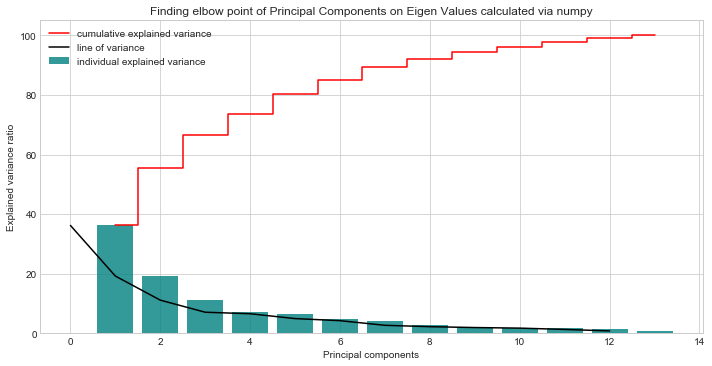

In [57]:
tot = sum(eigen_values_using_transposed_numpy)
var_exp = [(i / tot)*100 for i in sorted(eigen_values_using_transposed_numpy, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


plot_variance_scree_plot(var_exp,cum_var_exp, title = 'Finding elbow point of Principal Components on Eigen Values calculated via numpy')

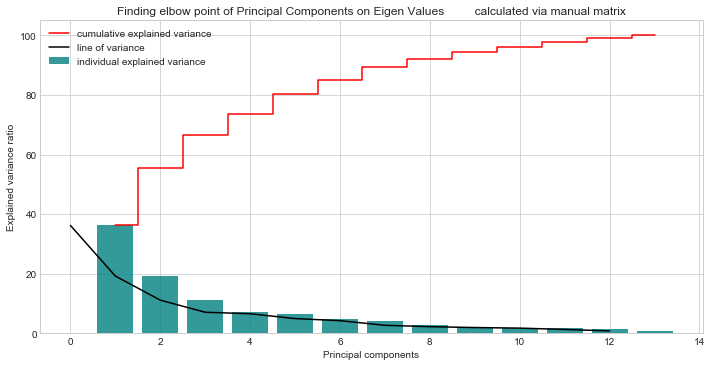

In [58]:
tot = sum(eigen_values_using_manual_matrix)
var_exp = [(i / tot)*100 for i in sorted(eigen_values_using_manual_matrix, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


plot_variance_scree_plot(var_exp,cum_var_exp, title = 'Finding elbow point of Principal Components on Eigen Values \
        calculated via manual matrix')

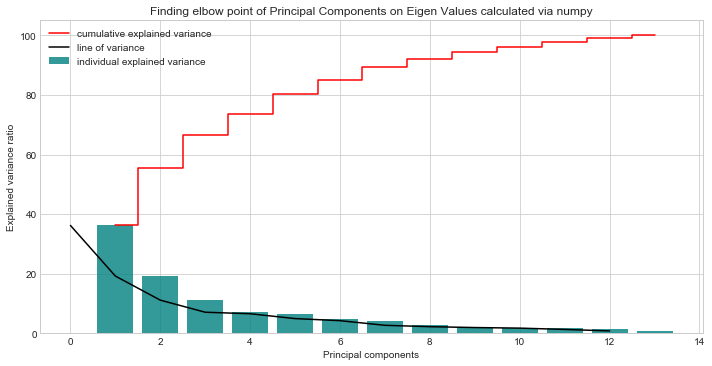

In [59]:
tot = sum(eigen_values_using_transposed_matrix)
var_exp = [(i / tot)*100 for i in sorted(eigen_values_using_transposed_matrix, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


plot_variance_scree_plot(var_exp,cum_var_exp, title = 'Finding elbow point of Principal Components on Eigen Values calculated via numpy')

#### IN ALL CASES, WE CAN SEE THAT THE ELBOW POINT IS AROUND PC3. AND THE FIRST PRINCIPAL COMPONENT ITSELF ACCOUNTS FOR NEARLY 40% VARIANCE

<br>

<b>LETS CREATE THE PCA TRANSFORMED FEATURE SET FROM THE EIGEN VECTORS AND VALUES</b>

In [33]:

eigen_values = eigen_values_using_transposed_numpy
eigen_vectors = eigen_vectors_using_transposed_numpy

## rememeber ith eigen value is the magnitude of the correspondnig ith column eigen vector
eigen_pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(len(eigen_values))]

eigen_pairs_sorted = sorted(eigen_pairs, key = lambda x: x[0], reverse = True)


print(len(eigen_pairs_sorted)) # eigen pair will be  a 13 length list, with each element being a tuple of (1 value , 13 values)


13


lets create the principal components matrix, taking top K values. in our example, we will take k = 2. <br>
To be honest, we are taking k = 2, so that we can draw the components in a graph. even though in our variance 
plot, we can see elbow point is post 3, ie. top 3 components contribute to the highest variance


remember our princinpal components are the eigen vectors, the eigen pairs are essentially eigen vectors sorted based 
on higher to lower eigen values. <br> So eigen_pairs_sorted at index 1 is the principal component. 
<br>We will create a matrix
out of the top 2 using np.hstack. why hstack? bcoz are eigen vectors are the columns.

In [34]:

projection_matrix = np.hstack(
                        (eigen_pairs_sorted[0][1][:, np.newaxis], #we give 2d dimension to a 1d list eigen_pairs_sorted[0][1]
                        eigen_pairs_sorted[1][1][:, np.newaxis])                        
                    )

projection_matrix.shape

(13, 2)

Now that we have our projection matrix, in order to transform our standardized original feature set x_std
onto the PCA subspace, <br>we have to do <b>X_PCA = X.dot(projection_matrix).</b>


<b> Lets pause a while and think about the dimensions</b>

1. our original feature set x was of the dimensions 178 * 13 . So 13 columns of data across 178 rows


2. Since our number of independent variables or number of features or number of dimensions was 13, we will get a 13 * 13 matrix denoting the eigen vectors.


3. Out of the 13 \* 13  eigen vector matrix , we select top K most. This creates a projection matrix of 13 * K. Remember in our case, K = 2


4. We now perform a dot product of the original 178 \* 13 matrix , with the 13 \* K projection matrix. Our result will be a 178 \* K matrix.

<b>And voilaaa!! All is well in the world, we have kept the original number of data and reduced the number of features as well



In [35]:
x_pca = x_std.dot(projection_matrix)

x_pca.shape

(178, 2)

Now that we have 2 dimensions, we can visualize our data set in a 2D graph

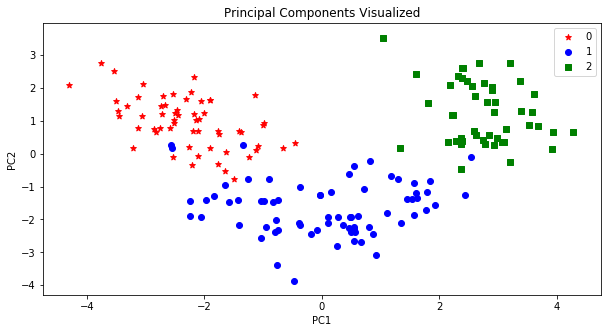

In [36]:
colors = ['red', 'blue' , 'green']
markers = ['*', 'o', 's'] # s for square

##essentially wine type 0,1,2 will be represented using a star, dot and square box in red blue and green colors respectively

wine_types = np.unique(y)

plot.figure(figsize = (10,5))

for wine_type, color, marker in zip(wine_types, colors, markers):
    
    plot.scatter(
    
                x_pca[y==wine_type, 0], ##y==winetype 0/1/2 gives row numbers which are for that wine type
                x_pca[y==wine_type, 1],
                c = color,
                label = wine_type,
                marker = marker
        
                )

# plot.figure(figsize = (10,5))
plot.title('Principal Components Visualized')
plot.xlabel('PC1')
plot.ylabel('PC2')
plot.legend(loc='best')

plot.show()



<br>

<b>LETS CREATE THE PCA FOR WINE DATASET AND RE-EVALUATE</b>

In [37]:
X, y = load_wine(return_X_y = True)

x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y)

scaler = StandardScaler()
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)

In [38]:
def create_pca_transformed(x):
    '''
    
    this method will take the matrix x and project it onto a PCA transformed sub space 
    it will always return a 2D pca matrix
    
    remember: we can very well simply use sklearn.decomposition.PCA class
    however this is for our own learning more than anything
    
    '''
    
    covariance_matrix = np.cov(x.T)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    
    eigen_pairs = [
        
                    (np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))
                ]
    
    eigen_pairs_sorted = sorted(eigen_pairs, key = lambda x: x[0], reverse = True)
    
    projection_matrix = np.hstack(
                                (
                                eigen_pairs_sorted[0][1][:, np.newaxis],
                                eigen_pairs_sorted[1][1][:, np.newaxis]
                                )
                        )
    
    return projection_matrix
#     pca_transformed = x.dot(projection_matrix)
    
#     return pca_transformed * -1
    
    
    
    

In [39]:
projection_matrix = create_pca_transformed(x_train_std)
x_train_pca = x_train_std.dot(projection_matrix)
x_test_pca = x_test_std.dot(projection_matrix)

In [40]:
x_train_pca.shape, x_test_pca.shape

((133, 2), (45, 2))

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_train_pca1 = pca.fit_transform(x_train_std)
x_test_pca1 = pca.transform(x_test_std)

In [42]:
classifier = Perceptron(max_iter = 50)

In [43]:
classifier.fit(x_train_pca,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
y_predictions = classifier.predict(x_test_pca)

In [45]:
accuracy_score(y_test, y_predictions)

0.9777777777777777

In [46]:
##just for comparison sake, lets compare the accuracy when we get the sklearn PCA lib
## we wll see that we get the same score
clf = Perceptron(max_iter = 50)
clf.fit(x_train_pca1,y_train)
accuracy_score(y_test, clf.predict(x_test_pca1))

0.9777777777777777

In [47]:
panda.crosstab(

    panda.Series(y_predictions, name = 'Predictions'),
    panda.Series(y_test, name = 'Actual'),
    margins = True

)

## we can see below that the model has misclassified 5 wines type out of 18 wines for type 1 wine
## it has also misclassified 6 out of 12 wines for type 2 wine

Actual,0,1,2,All
Predictions,,,,
0,14,0,0,14
1,1,18,0,19
2,0,0,12,12
All,15,18,12,45


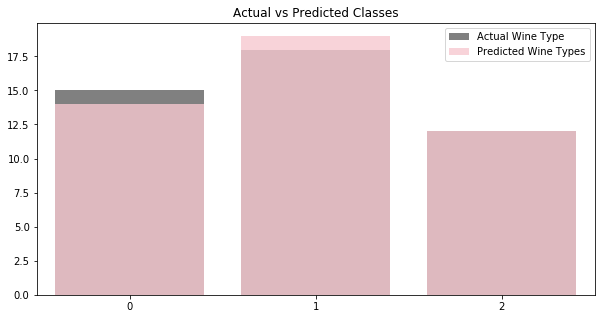

In [48]:

plot.figure(figsize= (10,5))
sns.barplot(x=np.unique(y_test),y=np.bincount(y_test), color='grey', label='Actual Wine Type')
sns.barplot(x=np.unique(y_predictions),y=np.bincount(y_predictions), color='pink', alpha=0.8, label='Predicted Wine Types')
plot.legend(loc = 'best')
plot.title('Actual vs Predicted Classes')
plot.show()

#### LA VOILA!!! Our accuracy has jumped to 95% from 71%

In [49]:

from matplotlib.colors import ListedColormap

def plot_decision_region(X,y,classifier, resolution = 0.2):
    
    
    markers = ['*', 'o', 's']
    colors = ['red', 'blue', 'green']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    
    '''
    why is meshgrid required? well we are drawing a contour plot. meaning drawing lines for x,y where
    z ie our target occurs. in order to do so, we take range between min value of pc1 and max value of pc1,
    and give points every 0.1 interval. 
    once we have those 1d array, we call meshgrid which will convert it to a 2d grid.
    
    eg say x = [a1,a2,a3], y = [b1,b2,b3], calling meshgrid(x,y) will return
    a list containing two matrices
    
    [
        a1,a2,a3
        a1,a2,a3
        a1,a2,a3    
    ]
    
    and
    
    [
        b1,b2,b3
        b1,b2,b3
        b1,b2,b3    
    ]
    
    
    '''
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    
    Z = Z.reshape(xx.shape)
    
    plot.figure(figsize = (10,5))
    
    '''
    what is a contour plot? countour plot is a way of reducing 3d to 2d. so given x,y,z co ordinates
    countour plot will draw lines on x,y where z occurs.
    in our case, x y are pc1 and pc2. whereas z is the target value of wine type
    '''
    plot.contourf(xx,yy,Z, alpha = 0.4, cmap = cmap)

    plot.xlim(xx.min(), xx.max())
    plot.ylim(yy.min(), yy.max())
    
    for idx, cl in enumerate(np.unique(y)):
        
        plot.scatter(
        
                    x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.3,
                    c = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label = cl
            )
        
    plot.xlabel('PC1')
    plot.ylabel('PC2')
    plot.legend(loc = 'best')
    plot.title('Decision Boundary Regions')
    plot.show()

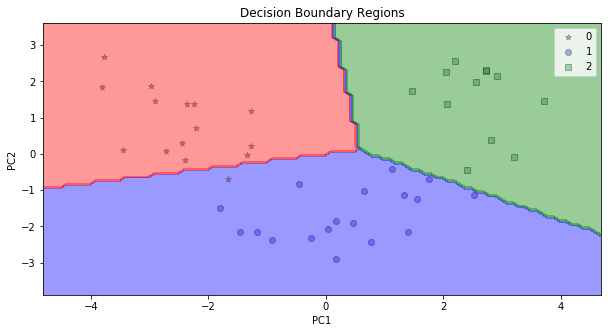

In [50]:
plot_decision_region(x_test_pca,y_test,classifier =  classifier, resolution = 0.2)